# General Package Imports

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import collections
import nltk
import wordcloud
import matplotlib.pyplot as plt # we only need pyplot
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from textblob import TextBlob
import random
import re

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [2]:
#read data from the csv file (Abhigyan's CSV file)
data = pd.read_csv("/Users/abhishekvaidyanathan/Desktop/NLP-project1/reviewSelected100.csv")

In [3]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [4]:
data['business_id'].nunique()

153

# Functions Required for each specification

In [5]:
def remove_stopwords(tokenized_sentence):
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in tokenized_sentence if not w.lower() in stop_words]
    filtered_sentence = []
    for w in tokenized_sentence:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

In [6]:
def tokenisation(sentence):
    word_tokens_with_stop = word_tokenize(sentence)
    word_tokens=remove_stopwords(word_tokens_with_stop)
    return word_tokens

In [7]:
def nltk_pos_tagging(sentence):
    tokenised_sentence=tokenisation(sentence)
    Pos_Tag_Sentence=nltk.pos_tag(tokenised_sentence)
    return Pos_Tag_Sentence

In [8]:
def sentence_tokenizer(sentence):
    tokenised_sentence = []
    tokenised_sentence = sent_tokenize(sentence)
    return tokenised_sentence

In [9]:
def tokenize_sentences(sentence_array):
    sentence_tokens = []
    for sentences in sentence_array:
        tokenize_sent = nltk_pos_tagging(sentences)
        sentence_tokens.append(tokenize_sent)
    return sentence_tokens

In [10]:
def get_text_sentiment(lyrics):
  analysis = TextBlob(lyrics)
  return analysis.sentiment.polarity

In [11]:
def get_sentence_sentiment(sentence_array):
    sentences_sentiment = []
    for sentences in sentence_array:
        sentiment = get_text_sentiment(sentences)
        sentences_sentiment.append(sentiment)
    return sentences_sentiment

In [12]:
def count_noun_adjective_pairs(sentence_array,sentiment_array):
    count_array = []
    i = 0
    for pos_tags_array in sentence_array:
        pos_tags_count_array = []
        for pos_tags in range(len(pos_tags_array)):
            if ((pos_tags_array[pos_tags][1]) == "NN"):
                for pos_tags_next in range(len(pos_tags_array)):
                    if (pos_tags_array[pos_tags_next][1]=="JJ"):
                        pos_tags_count_array.append([pos_tags_array[pos_tags][0],pos_tags_array[pos_tags_next][0]])
        count_array.append([pos_tags_count_array,len(pos_tags_count_array),sentiment_array[i]])
        i = i+1

    return count_array

In [13]:
def extract_all_noun_adjective_pairs(noun_adjective_pairs,all_noun_adjective_pairs,all_noun_adjective_sentiments):
    for all_pairs in noun_adjective_pairs:
        if (all_pairs[0]!=[]):
            all_noun_adjective_pairs.extend(all_pairs[0])
            for i in range(all_pairs[1]):
                all_noun_adjective_sentiments.append(all_pairs[2])

In [14]:
def convert_list_to_tuple(all_noun_adjective_pairs):
    for i in range(len(all_noun_adjective_pairs)):
        all_noun_adjective_pairs[i] = tuple(all_noun_adjective_pairs[i])

    return all_noun_adjective_pairs

In [15]:
def get_most_common_word_pair(all_noun_adjective_pairs_tuple,top_k,indexes):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    final_list = counter.most_common(top_k)
    for i in range(len(all_noun_adjective_pairs_tuple)):
        for j in final_list:
            if(all_noun_adjective_pairs_tuple[i]==j[0]):
                indexes.append(i)
    return final_list

In [16]:
def get_count_for_specific_word_pairs(all_noun_adjective_pairs_tuple,key_value):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    return dict1[key_value]

In [17]:
def get_count_and_common_word_pairs(tuple1,tuple2):
    list1_as_set = set(tuple1)
    intersection = list1_as_set.intersection(tuple2)
    intersection_as_list = list(intersection)
    for common_elements in intersection_as_list:
        count1 = get_count_for_specific_word_pairs(tuple1,common_elements)
        count2 = get_count_for_specific_word_pairs(tuple2,common_elements)
        print("The common element is ",common_elements,". The count from from each of the tuples are: ",str([count1,count2]),".")


In [18]:
def get_top_frequent_pairs_words(data_rating,top_k):
    all_noun_adjective_pairs_rating = []
    all_noun_adjective_sentiments = []
    indexes = []
    data_rating.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_sentiments),axis=1)
    all_noun_adjective_pairs__rating_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)
    top_frequent_pairs_rating = [get_most_common_word_pair(all_noun_adjective_pairs__rating_tuple,top_k,indexes)]
    top_frequent_pairs_rating.append(indexes)
    top_frequent_pairs_rating.append(all_noun_adjective_sentiments)
    return (top_frequent_pairs_rating)

In [115]:
def barplot_for_the_frequent_word_pairs(data,top_k):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    frequency = []
    word_pairs = []
    for i in get_top_frequent_pairs_words(data,top_k)[0]:
        frequency.append(int(i[1]))
        word_pairs.append(str(i[0]))
    ax.bar(tuple(word_pairs),tuple(frequency))
    ax.set_ylabel('frequency')
    ax.set_xlabel('Word Pairs')
    ax.set_title('frequence of top '+str(top_k)+' word pairs')
    plt.xticks(rotation='vertical')
    plt.show()

In [20]:
def show_wordclouds(data, title):
    text = ' '.join(data['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600, collocations=False).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

# Implementation To Get Noun-Adjective Pairs From 50 Random Reviews Rated 1 

In [21]:
data_rating_1 = data[data['stars']==1]
data_random_new = data_rating_1.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_50_rating_1 = data_random_new.sample(50)
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
105,bW6O-tkCL35xsJvKdDgugQ,j4SdOoAfQr_PbyDS6RBMSQ,mF2EW3twSrFPmT_RVV1-Qg,1,7,3,0,"Well, I was really hoping to review this as a ...",2013-06-17 00:44:08
70,5Ax3uUW5iuUMUuz0LmnflA,bwgMLL8Lq021V0n7lAkADA,XVDR44P_74FmA0ANanm4CQ,1,4,0,2,I overheard a girl talking about House of Pizz...,2011-03-28 02:45:56
34,bDrZhoVLnM8QqNrv0aFmbQ,WWhSp4ccTLd7cRlbAwk5Sg,IeK0nzbMPbWnUBIPB83v6A,1,0,0,0,don't even bother requesting a song. even if y...,2014-09-01 14:50:38
131,izxPa1RTMH8Jm1ggP9BUYQ,N6Brpfa3Gru5CvOSl3iVHw,vuHzLZ7nAeT-EiecOkS5Og,1,5,2,1,Company was sent out through home warranty and...,2012-09-28 19:22:26
118,A3Yg5vt2Pm33Mkplvx9cew,xkLdXLpfVOebdKkGRF2E5g,rZrhB-arwsFOLFVXzKvB6A,1,2,0,0,"Gross bathroom, and dirty play area. I go to m...",2014-09-14 07:30:32


In [22]:
data_random_50_rating_1.shape

(50, 9)

In [23]:
data_random_50_rating_1['pos_tags'] = data_random_50_rating_1.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)

In [24]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
105,bW6O-tkCL35xsJvKdDgugQ,j4SdOoAfQr_PbyDS6RBMSQ,mF2EW3twSrFPmT_RVV1-Qg,1,7,3,0,"Well, I was really hoping to review this as a ...",2013-06-17 00:44:08,"[(Well, RB), (,, ,), (I, PRP), (really, RB), (..."
70,5Ax3uUW5iuUMUuz0LmnflA,bwgMLL8Lq021V0n7lAkADA,XVDR44P_74FmA0ANanm4CQ,1,4,0,2,I overheard a girl talking about House of Pizz...,2011-03-28 02:45:56,"[(I, PRP), (overheard, VBP), (girl, JJ), (talk..."
34,bDrZhoVLnM8QqNrv0aFmbQ,WWhSp4ccTLd7cRlbAwk5Sg,IeK0nzbMPbWnUBIPB83v6A,1,0,0,0,don't even bother requesting a song. even if y...,2014-09-01 14:50:38,"[(n't, RB), (even, RB), (bother, VB), (request..."
131,izxPa1RTMH8Jm1ggP9BUYQ,N6Brpfa3Gru5CvOSl3iVHw,vuHzLZ7nAeT-EiecOkS5Og,1,5,2,1,Company was sent out through home warranty and...,2012-09-28 19:22:26,"[(Company, NN), (sent, VBD), (home, NN), (warr..."
118,A3Yg5vt2Pm33Mkplvx9cew,xkLdXLpfVOebdKkGRF2E5g,rZrhB-arwsFOLFVXzKvB6A,1,2,0,0,"Gross bathroom, and dirty play area. I go to m...",2014-09-14 07:30:32,"[(Gross, NNP), (bathroom, NN), (,, ,), (dirty,..."


In [25]:
data_random_50_rating_1['text_sentiment'] = data_random_50_rating_1.apply(lambda row: get_text_sentiment(row['text']), axis=1)

In [26]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
105,bW6O-tkCL35xsJvKdDgugQ,j4SdOoAfQr_PbyDS6RBMSQ,mF2EW3twSrFPmT_RVV1-Qg,1,7,3,0,"Well, I was really hoping to review this as a ...",2013-06-17 00:44:08,"[(Well, RB), (,, ,), (I, PRP), (really, RB), (...",-0.052237
70,5Ax3uUW5iuUMUuz0LmnflA,bwgMLL8Lq021V0n7lAkADA,XVDR44P_74FmA0ANanm4CQ,1,4,0,2,I overheard a girl talking about House of Pizz...,2011-03-28 02:45:56,"[(I, PRP), (overheard, VBP), (girl, JJ), (talk...",0.209922
34,bDrZhoVLnM8QqNrv0aFmbQ,WWhSp4ccTLd7cRlbAwk5Sg,IeK0nzbMPbWnUBIPB83v6A,1,0,0,0,don't even bother requesting a song. even if y...,2014-09-01 14:50:38,"[(n't, RB), (even, RB), (bother, VB), (request...",0.000000
131,izxPa1RTMH8Jm1ggP9BUYQ,N6Brpfa3Gru5CvOSl3iVHw,vuHzLZ7nAeT-EiecOkS5Og,1,5,2,1,Company was sent out through home warranty and...,2012-09-28 19:22:26,"[(Company, NN), (sent, VBD), (home, NN), (warr...",-0.508333
118,A3Yg5vt2Pm33Mkplvx9cew,xkLdXLpfVOebdKkGRF2E5g,rZrhB-arwsFOLFVXzKvB6A,1,2,0,0,"Gross bathroom, and dirty play area. I go to m...",2014-09-14 07:30:32,"[(Gross, NNP), (bathroom, NN), (,, ,), (dirty,...",-0.159091


In [27]:
data_random_50_rating_1['sentence tokenizer'] = data_random_50_rating_1.apply(lambda row: sentence_tokenizer(row['text']),axis=1)

In [28]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
105,bW6O-tkCL35xsJvKdDgugQ,j4SdOoAfQr_PbyDS6RBMSQ,mF2EW3twSrFPmT_RVV1-Qg,1,7,3,0,"Well, I was really hoping to review this as a ...",2013-06-17 00:44:08,"[(Well, RB), (,, ,), (I, PRP), (really, RB), (...",-0.052237,"[Well, I was really hoping to review this as a..."
70,5Ax3uUW5iuUMUuz0LmnflA,bwgMLL8Lq021V0n7lAkADA,XVDR44P_74FmA0ANanm4CQ,1,4,0,2,I overheard a girl talking about House of Pizz...,2011-03-28 02:45:56,"[(I, PRP), (overheard, VBP), (girl, JJ), (talk...",0.209922,[I overheard a girl talking about House of Piz...
34,bDrZhoVLnM8QqNrv0aFmbQ,WWhSp4ccTLd7cRlbAwk5Sg,IeK0nzbMPbWnUBIPB83v6A,1,0,0,0,don't even bother requesting a song. even if y...,2014-09-01 14:50:38,"[(n't, RB), (even, RB), (bother, VB), (request...",0.000000,"[don't even bother requesting a song., even if..."
131,izxPa1RTMH8Jm1ggP9BUYQ,N6Brpfa3Gru5CvOSl3iVHw,vuHzLZ7nAeT-EiecOkS5Og,1,5,2,1,Company was sent out through home warranty and...,2012-09-28 19:22:26,"[(Company, NN), (sent, VBD), (home, NN), (warr...",-0.508333,[Company was sent out through home warranty an...
118,A3Yg5vt2Pm33Mkplvx9cew,xkLdXLpfVOebdKkGRF2E5g,rZrhB-arwsFOLFVXzKvB6A,1,2,0,0,"Gross bathroom, and dirty play area. I go to m...",2014-09-14 07:30:32,"[(Gross, NNP), (bathroom, NN), (,, ,), (dirty,...",-0.159091,"[Gross bathroom, and dirty play area., I go to..."


In [29]:
data_random_50_rating_1["sentence_tokens_pos_tags"] = data_random_50_rating_1.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)

In [30]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
105,bW6O-tkCL35xsJvKdDgugQ,j4SdOoAfQr_PbyDS6RBMSQ,mF2EW3twSrFPmT_RVV1-Qg,1,7,3,0,"Well, I was really hoping to review this as a ...",2013-06-17 00:44:08,"[(Well, RB), (,, ,), (I, PRP), (really, RB), (...",-0.052237,"[Well, I was really hoping to review this as a...","[[(Well, RB), (,, ,), (I, PRP), (really, RB), ..."
70,5Ax3uUW5iuUMUuz0LmnflA,bwgMLL8Lq021V0n7lAkADA,XVDR44P_74FmA0ANanm4CQ,1,4,0,2,I overheard a girl talking about House of Pizz...,2011-03-28 02:45:56,"[(I, PRP), (overheard, VBP), (girl, JJ), (talk...",0.209922,[I overheard a girl talking about House of Piz...,"[[(I, PRP), (overheard, VBP), (girl, JJ), (tal..."
34,bDrZhoVLnM8QqNrv0aFmbQ,WWhSp4ccTLd7cRlbAwk5Sg,IeK0nzbMPbWnUBIPB83v6A,1,0,0,0,don't even bother requesting a song. even if y...,2014-09-01 14:50:38,"[(n't, RB), (even, RB), (bother, VB), (request...",0.000000,"[don't even bother requesting a song., even if...","[[(n't, RB), (even, RB), (bother, VB), (reques..."
131,izxPa1RTMH8Jm1ggP9BUYQ,N6Brpfa3Gru5CvOSl3iVHw,vuHzLZ7nAeT-EiecOkS5Og,1,5,2,1,Company was sent out through home warranty and...,2012-09-28 19:22:26,"[(Company, NN), (sent, VBD), (home, NN), (warr...",-0.508333,[Company was sent out through home warranty an...,"[[(Company, NN), (sent, VBD), (home, NN), (war..."
118,A3Yg5vt2Pm33Mkplvx9cew,xkLdXLpfVOebdKkGRF2E5g,rZrhB-arwsFOLFVXzKvB6A,1,2,0,0,"Gross bathroom, and dirty play area. I go to m...",2014-09-14 07:30:32,"[(Gross, NNP), (bathroom, NN), (,, ,), (dirty,...",-0.159091,"[Gross bathroom, and dirty play area., I go to...","[[(Gross, NNP), (bathroom, NN), (,, ,), (dirty..."


In [31]:
data_random_50_rating_1['sentences_sentiment'] = data_random_50_rating_1.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)

In [32]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
105,bW6O-tkCL35xsJvKdDgugQ,j4SdOoAfQr_PbyDS6RBMSQ,mF2EW3twSrFPmT_RVV1-Qg,1,7,3,0,"Well, I was really hoping to review this as a ...",2013-06-17 00:44:08,"[(Well, RB), (,, ,), (I, PRP), (really, RB), (...",-0.052237,"[Well, I was really hoping to review this as a...","[[(Well, RB), (,, ,), (I, PRP), (really, RB), ...","[0.2, 0.0, 0.05000000000000001, -0.5625, 0.287..."
70,5Ax3uUW5iuUMUuz0LmnflA,bwgMLL8Lq021V0n7lAkADA,XVDR44P_74FmA0ANanm4CQ,1,4,0,2,I overheard a girl talking about House of Pizz...,2011-03-28 02:45:56,"[(I, PRP), (overheard, VBP), (girl, JJ), (talk...",0.209922,[I overheard a girl talking about House of Piz...,"[[(I, PRP), (overheard, VBP), (girl, JJ), (tal...","[0.35740740740740734, -0.1125, 0.4361111111111..."
34,bDrZhoVLnM8QqNrv0aFmbQ,WWhSp4ccTLd7cRlbAwk5Sg,IeK0nzbMPbWnUBIPB83v6A,1,0,0,0,don't even bother requesting a song. even if y...,2014-09-01 14:50:38,"[(n't, RB), (even, RB), (bother, VB), (request...",0.000000,"[don't even bother requesting a song., even if...","[[(n't, RB), (even, RB), (bother, VB), (reques...","[0.0, 0.0]"
131,izxPa1RTMH8Jm1ggP9BUYQ,N6Brpfa3Gru5CvOSl3iVHw,vuHzLZ7nAeT-EiecOkS5Og,1,5,2,1,Company was sent out through home warranty and...,2012-09-28 19:22:26,"[(Company, NN), (sent, VBD), (home, NN), (warr...",-0.508333,[Company was sent out through home warranty an...,"[[(Company, NN), (sent, VBD), (home, NN), (war...","[-1.0, -0.125, -0.4]"
118,A3Yg5vt2Pm33Mkplvx9cew,xkLdXLpfVOebdKkGRF2E5g,rZrhB-arwsFOLFVXzKvB6A,1,2,0,0,"Gross bathroom, and dirty play area. I go to m...",2014-09-14 07:30:32,"[(Gross, NNP), (bathroom, NN), (,, ,), (dirty,...",-0.159091,"[Gross bathroom, and dirty play area., I go to...","[[(Gross, NNP), (bathroom, NN), (,, ,), (dirty...","[-0.3, 0.43333333333333335, 0.0, -0.2, 0.0, -1..."


In [33]:
data_random_50_rating_1.iloc[0]['sentence_tokens_pos_tags'][1][0][1]

'IN'

In [34]:
data_random_50_rating_1["noun_adjective_pairs"] = data_random_50_rating_1.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)

In [35]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
105,bW6O-tkCL35xsJvKdDgugQ,j4SdOoAfQr_PbyDS6RBMSQ,mF2EW3twSrFPmT_RVV1-Qg,1,7,3,0,"Well, I was really hoping to review this as a ...",2013-06-17 00:44:08,"[(Well, RB), (,, ,), (I, PRP), (really, RB), (...",-0.052237,"[Well, I was really hoping to review this as a...","[[(Well, RB), (,, ,), (I, PRP), (really, RB), ...","[0.2, 0.0, 0.05000000000000001, -0.5625, 0.287...","[[[['review', 'A-OK'], ['star', 'A-OK'], ['est..."
70,5Ax3uUW5iuUMUuz0LmnflA,bwgMLL8Lq021V0n7lAkADA,XVDR44P_74FmA0ANanm4CQ,1,4,0,2,I overheard a girl talking about House of Pizz...,2011-03-28 02:45:56,"[(I, PRP), (overheard, VBP), (girl, JJ), (talk...",0.209922,[I overheard a girl talking about House of Piz...,"[[(I, PRP), (overheard, VBP), (girl, JJ), (tal...","[0.35740740740740734, -0.1125, 0.4361111111111...","[[[['day', 'girl'], ['day', 'whole'], ['day', ..."
34,bDrZhoVLnM8QqNrv0aFmbQ,WWhSp4ccTLd7cRlbAwk5Sg,IeK0nzbMPbWnUBIPB83v6A,1,0,0,0,don't even bother requesting a song. even if y...,2014-09-01 14:50:38,"[(n't, RB), (even, RB), (bother, VB), (request...",0.000000,"[don't even bother requesting a song., even if...","[[(n't, RB), (even, RB), (bother, VB), (reques...","[0.0, 0.0]","[[[], 0, 0.0], [[], 0, 0.0]]"
131,izxPa1RTMH8Jm1ggP9BUYQ,N6Brpfa3Gru5CvOSl3iVHw,vuHzLZ7nAeT-EiecOkS5Og,1,5,2,1,Company was sent out through home warranty and...,2012-09-28 19:22:26,"[(Company, NN), (sent, VBD), (home, NN), (warr...",-0.508333,[Company was sent out through home warranty an...,"[[(Company, NN), (sent, VBD), (home, NN), (war...","[-1.0, -0.125, -0.4]","[[[['Company', 'horrible'], ['home', 'horrible..."
118,A3Yg5vt2Pm33Mkplvx9cew,xkLdXLpfVOebdKkGRF2E5g,rZrhB-arwsFOLFVXzKvB6A,1,2,0,0,"Gross bathroom, and dirty play area. I go to m...",2014-09-14 07:30:32,"[(Gross, NNP), (bathroom, NN), (,, ,), (dirty,...",-0.159091,"[Gross bathroom, and dirty play area., I go to...","[[(Gross, NNP), (bathroom, NN), (,, ,), (dirty...","[-0.3, 0.43333333333333335, 0.0, -0.2, 0.0, -1...","[[[['bathroom', 'dirty'], ['play', 'dirty'], [..."


In [36]:
top_frequent = get_top_frequent_pairs_words(data_random_50_rating_1,3)

In [37]:
top_frequent[0]

[(('service', 'great'), 7), (('foot', 'top'), 7), (('plate', 'cheese'), 6)]

In [38]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent[1]:
    print(top_frequent[2][i])

the sentiments for each of the word pairs are :
0.0
0.0
-0.9375
0.0
-0.08333333333333333
0.0
0.43333333333333335
0.45
0.31666666666666665
0.2357142857142857
0.2357142857142857
0.5
0.3333333333333333
0.20777777777777776
0.20777777777777776
0.3350000000000001
0.2625
0.48750000000000004
0.48750000000000004
0.8


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 2

In [39]:
data_rating_2 = data[data['stars']==2]
data_random_rating_2 = data_rating_2.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_2 = data_random_rating_2.sample(20)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
95,ioimN5n5rKq0lLabQ6y1-Q,R4f8KARAcBgmoW5-abcaxA,hM48axj9twnf7A6a5f8cjA,2,2,0,0,Come here if you want to be entertained in a b...,2018-01-12 21:39:04
9,Q_aGqz6-xOwpol9RqOuNtg,Ru2NSw1CzoGAsXYvDGf0Uw,4tjKsIaBXCDUP9PL82Vu_A,2,2,0,0,Had eyebrows done and esthetician ripped my sk...,2014-02-02 01:11:17
118,8w-i2ceVBwHPk36mxerN_Q,1U1oETwDTcEcsh7_KSSAnQ,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,This place used to be much much better years a...,2012-11-08 22:12:25
131,kyWOXgIfySAmulPBMD38lQ,xVxLjKTfBIctvO5XmHKSag,w5LUtmw4G1KD7qAntqGd9w,2,0,0,0,Someone told me they used to love this place i...,2015-06-15 09:15:52
136,rtWUfjEyJ96tXIyVgaVung,nfTdSng4PrZLJfrVMi-tYQ,xVpE01l6ZXdEtVf5PkRpDg,2,1,0,0,A couple of weeks ago we took a friend to dinn...,2016-06-16 17:22:33


In [40]:
data_random_20_rating_2.shape

(20, 9)

In [41]:
data_random_20_rating_2['pos_tags'] = data_random_20_rating_2.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
95,ioimN5n5rKq0lLabQ6y1-Q,R4f8KARAcBgmoW5-abcaxA,hM48axj9twnf7A6a5f8cjA,2,2,0,0,Come here if you want to be entertained in a b...,2018-01-12 21:39:04,"[(Come, NNP), (want, VBP), (entertained, VBN),..."
9,Q_aGqz6-xOwpol9RqOuNtg,Ru2NSw1CzoGAsXYvDGf0Uw,4tjKsIaBXCDUP9PL82Vu_A,2,2,0,0,Had eyebrows done and esthetician ripped my sk...,2014-02-02 01:11:17,"[(Had, NNP), (eyebrows, VBZ), (done, VBN), (es..."
118,8w-i2ceVBwHPk36mxerN_Q,1U1oETwDTcEcsh7_KSSAnQ,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,This place used to be much much better years a...,2012-11-08 22:12:25,"[(This, DT), (place, NN), (used, VBD), (much, ..."
131,kyWOXgIfySAmulPBMD38lQ,xVxLjKTfBIctvO5XmHKSag,w5LUtmw4G1KD7qAntqGd9w,2,0,0,0,Someone told me they used to love this place i...,2015-06-15 09:15:52,"[(Someone, NN), (told, VBD), (used, VBN), (lov..."
136,rtWUfjEyJ96tXIyVgaVung,nfTdSng4PrZLJfrVMi-tYQ,xVpE01l6ZXdEtVf5PkRpDg,2,1,0,0,A couple of weeks ago we took a friend to dinn...,2016-06-16 17:22:33,"[(A, DT), (couple, NN), (weeks, NNS), (ago, RB..."


In [42]:
data_random_20_rating_2['text_sentiment'] = data_random_20_rating_2.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
95,ioimN5n5rKq0lLabQ6y1-Q,R4f8KARAcBgmoW5-abcaxA,hM48axj9twnf7A6a5f8cjA,2,2,0,0,Come here if you want to be entertained in a b...,2018-01-12 21:39:04,"[(Come, NNP), (want, VBP), (entertained, VBN),...",0.097972
9,Q_aGqz6-xOwpol9RqOuNtg,Ru2NSw1CzoGAsXYvDGf0Uw,4tjKsIaBXCDUP9PL82Vu_A,2,2,0,0,Had eyebrows done and esthetician ripped my sk...,2014-02-02 01:11:17,"[(Had, NNP), (eyebrows, VBZ), (done, VBN), (es...",-0.010606
118,8w-i2ceVBwHPk36mxerN_Q,1U1oETwDTcEcsh7_KSSAnQ,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,This place used to be much much better years a...,2012-11-08 22:12:25,"[(This, DT), (place, NN), (used, VBD), (much, ...",-0.011599
131,kyWOXgIfySAmulPBMD38lQ,xVxLjKTfBIctvO5XmHKSag,w5LUtmw4G1KD7qAntqGd9w,2,0,0,0,Someone told me they used to love this place i...,2015-06-15 09:15:52,"[(Someone, NN), (told, VBD), (used, VBN), (lov...",-0.103571
136,rtWUfjEyJ96tXIyVgaVung,nfTdSng4PrZLJfrVMi-tYQ,xVpE01l6ZXdEtVf5PkRpDg,2,1,0,0,A couple of weeks ago we took a friend to dinn...,2016-06-16 17:22:33,"[(A, DT), (couple, NN), (weeks, NNS), (ago, RB...",0.082692


In [43]:
data_random_20_rating_2['sentence tokenizer'] = data_random_20_rating_2.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
95,ioimN5n5rKq0lLabQ6y1-Q,R4f8KARAcBgmoW5-abcaxA,hM48axj9twnf7A6a5f8cjA,2,2,0,0,Come here if you want to be entertained in a b...,2018-01-12 21:39:04,"[(Come, NNP), (want, VBP), (entertained, VBN),...",0.097972,[Come here if you want to be entertained in a ...
9,Q_aGqz6-xOwpol9RqOuNtg,Ru2NSw1CzoGAsXYvDGf0Uw,4tjKsIaBXCDUP9PL82Vu_A,2,2,0,0,Had eyebrows done and esthetician ripped my sk...,2014-02-02 01:11:17,"[(Had, NNP), (eyebrows, VBZ), (done, VBN), (es...",-0.010606,[Had eyebrows done and esthetician ripped my s...
118,8w-i2ceVBwHPk36mxerN_Q,1U1oETwDTcEcsh7_KSSAnQ,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,This place used to be much much better years a...,2012-11-08 22:12:25,"[(This, DT), (place, NN), (used, VBD), (much, ...",-0.011599,[This place used to be much much better years ...
131,kyWOXgIfySAmulPBMD38lQ,xVxLjKTfBIctvO5XmHKSag,w5LUtmw4G1KD7qAntqGd9w,2,0,0,0,Someone told me they used to love this place i...,2015-06-15 09:15:52,"[(Someone, NN), (told, VBD), (used, VBN), (lov...",-0.103571,[Someone told me they used to love this place ...
136,rtWUfjEyJ96tXIyVgaVung,nfTdSng4PrZLJfrVMi-tYQ,xVpE01l6ZXdEtVf5PkRpDg,2,1,0,0,A couple of weeks ago we took a friend to dinn...,2016-06-16 17:22:33,"[(A, DT), (couple, NN), (weeks, NNS), (ago, RB...",0.082692,[A couple of weeks ago we took a friend to din...


In [44]:
data_random_20_rating_2["sentence_tokens_pos_tags"] = data_random_20_rating_2.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
95,ioimN5n5rKq0lLabQ6y1-Q,R4f8KARAcBgmoW5-abcaxA,hM48axj9twnf7A6a5f8cjA,2,2,0,0,Come here if you want to be entertained in a b...,2018-01-12 21:39:04,"[(Come, NNP), (want, VBP), (entertained, VBN),...",0.097972,[Come here if you want to be entertained in a ...,"[[(Come, NNP), (want, VBP), (entertained, VBN)..."
9,Q_aGqz6-xOwpol9RqOuNtg,Ru2NSw1CzoGAsXYvDGf0Uw,4tjKsIaBXCDUP9PL82Vu_A,2,2,0,0,Had eyebrows done and esthetician ripped my sk...,2014-02-02 01:11:17,"[(Had, NNP), (eyebrows, VBZ), (done, VBN), (es...",-0.010606,[Had eyebrows done and esthetician ripped my s...,"[[(Had, NNP), (eyebrows, VBZ), (done, VBN), (e..."
118,8w-i2ceVBwHPk36mxerN_Q,1U1oETwDTcEcsh7_KSSAnQ,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,This place used to be much much better years a...,2012-11-08 22:12:25,"[(This, DT), (place, NN), (used, VBD), (much, ...",-0.011599,[This place used to be much much better years ...,"[[(This, DT), (place, NN), (used, VBD), (much,..."
131,kyWOXgIfySAmulPBMD38lQ,xVxLjKTfBIctvO5XmHKSag,w5LUtmw4G1KD7qAntqGd9w,2,0,0,0,Someone told me they used to love this place i...,2015-06-15 09:15:52,"[(Someone, NN), (told, VBD), (used, VBN), (lov...",-0.103571,[Someone told me they used to love this place ...,"[[(Someone, NN), (told, VBD), (used, VBN), (lo..."
136,rtWUfjEyJ96tXIyVgaVung,nfTdSng4PrZLJfrVMi-tYQ,xVpE01l6ZXdEtVf5PkRpDg,2,1,0,0,A couple of weeks ago we took a friend to dinn...,2016-06-16 17:22:33,"[(A, DT), (couple, NN), (weeks, NNS), (ago, RB...",0.082692,[A couple of weeks ago we took a friend to din...,"[[(A, DT), (couple, NN), (weeks, NNS), (ago, R..."


In [45]:
data_random_20_rating_2['sentences_sentiment'] = data_random_20_rating_2.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_2.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
95,ioimN5n5rKq0lLabQ6y1-Q,R4f8KARAcBgmoW5-abcaxA,hM48axj9twnf7A6a5f8cjA,2,2,0,0,Come here if you want to be entertained in a b...,2018-01-12 21:39:04,"[(Come, NNP), (want, VBP), (entertained, VBN),...",0.097972,[Come here if you want to be entertained in a ...,"[[(Come, NNP), (want, VBP), (entertained, VBN)...","[0.85, 0.6999999999999998, -0.2083333333333333..."
9,Q_aGqz6-xOwpol9RqOuNtg,Ru2NSw1CzoGAsXYvDGf0Uw,4tjKsIaBXCDUP9PL82Vu_A,2,2,0,0,Had eyebrows done and esthetician ripped my sk...,2014-02-02 01:11:17,"[(Had, NNP), (eyebrows, VBZ), (done, VBN), (es...",-0.010606,[Had eyebrows done and esthetician ripped my s...,"[[(Had, NNP), (eyebrows, VBZ), (done, VBN), (e...","[0.0, -0.3, 0.0, 0.0, 0.11818181818181818, 0.0..."
118,8w-i2ceVBwHPk36mxerN_Q,1U1oETwDTcEcsh7_KSSAnQ,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,This place used to be much much better years a...,2012-11-08 22:12:25,"[(This, DT), (place, NN), (used, VBD), (much, ...",-0.011599,[This place used to be much much better years ...,"[[(This, DT), (place, NN), (used, VBD), (much,...","[0.5, 0.20476190476190478, -0.0833333333333333..."
131,kyWOXgIfySAmulPBMD38lQ,xVxLjKTfBIctvO5XmHKSag,w5LUtmw4G1KD7qAntqGd9w,2,0,0,0,Someone told me they used to love this place i...,2015-06-15 09:15:52,"[(Someone, NN), (told, VBD), (used, VBN), (lov...",-0.103571,[Someone told me they used to love this place ...,"[[(Someone, NN), (told, VBD), (used, VBN), (lo...","[0.5, 0.0, -1.0, -0.30000000000000004, 0.0, 0...."
136,rtWUfjEyJ96tXIyVgaVung,nfTdSng4PrZLJfrVMi-tYQ,xVpE01l6ZXdEtVf5PkRpDg,2,1,0,0,A couple of weeks ago we took a friend to dinn...,2016-06-16 17:22:33,"[(A, DT), (couple, NN), (weeks, NNS), (ago, RB...",0.082692,[A couple of weeks ago we took a friend to din...,"[[(A, DT), (couple, NN), (weeks, NNS), (ago, R...","[0.0, 0.05, 0.0, -0.0625, 0.0, 0.2, 0.3, -0.25..."


In [46]:
data_random_20_rating_2["noun_adjective_pairs"] = data_random_20_rating_2.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
95,ioimN5n5rKq0lLabQ6y1-Q,R4f8KARAcBgmoW5-abcaxA,hM48axj9twnf7A6a5f8cjA,2,2,0,0,Come here if you want to be entertained in a b...,2018-01-12 21:39:04,"[(Come, NNP), (want, VBP), (entertained, VBN),...",0.097972,[Come here if you want to be entertained in a ...,"[[(Come, NNP), (want, VBP), (entertained, VBN)...","[0.85, 0.6999999999999998, -0.2083333333333333...","[[[['restaurant', 'beautiful']], 1, 0.85], [[[..."
9,Q_aGqz6-xOwpol9RqOuNtg,Ru2NSw1CzoGAsXYvDGf0Uw,4tjKsIaBXCDUP9PL82Vu_A,2,2,0,0,Had eyebrows done and esthetician ripped my sk...,2014-02-02 01:11:17,"[(Had, NNP), (eyebrows, VBZ), (done, VBN), (es...",-0.010606,[Had eyebrows done and esthetician ripped my s...,"[[(Had, NNP), (eyebrows, VBZ), (done, VBN), (e...","[0.0, -0.3, 0.0, 0.0, 0.11818181818181818, 0.0...","[[[['skin', 'esthetician']], 1, 0.0], [[], 0, ..."
118,8w-i2ceVBwHPk36mxerN_Q,1U1oETwDTcEcsh7_KSSAnQ,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,This place used to be much much better years a...,2012-11-08 22:12:25,"[(This, DT), (place, NN), (used, VBD), (much, ...",-0.011599,[This place used to be much much better years ...,"[[(This, DT), (place, NN), (used, VBD), (much,...","[0.5, 0.20476190476190478, -0.0833333333333333...","[[[['place', 'much']], 1, 0.5], [[['food', 'la..."
131,kyWOXgIfySAmulPBMD38lQ,xVxLjKTfBIctvO5XmHKSag,w5LUtmw4G1KD7qAntqGd9w,2,0,0,0,Someone told me they used to love this place i...,2015-06-15 09:15:52,"[(Someone, NN), (told, VBD), (used, VBN), (lov...",-0.103571,[Someone told me they used to love this place ...,"[[(Someone, NN), (told, VBD), (used, VBN), (lo...","[0.5, 0.0, -1.0, -0.30000000000000004, 0.0, 0....","[[[], 0, 0.5], [[], 0, 0.0], [[], 0, -1.0], [[..."
136,rtWUfjEyJ96tXIyVgaVung,nfTdSng4PrZLJfrVMi-tYQ,xVpE01l6ZXdEtVf5PkRpDg,2,1,0,0,A couple of weeks ago we took a friend to dinn...,2016-06-16 17:22:33,"[(A, DT), (couple, NN), (weeks, NNS), (ago, RB...",0.082692,[A couple of weeks ago we took a friend to din...,"[[(A, DT), (couple, NN), (weeks, NNS), (ago, R...","[0.0, 0.05, 0.0, -0.0625, 0.0, 0.2, 0.3, -0.25...","[[[], 0, 0.0], [[], 0, 0.05], [[], 0, 0.0], [[..."


In [47]:
top_frequent_rating_2 = get_top_frequent_pairs_words(data_random_20_rating_2,3)

In [48]:
top_frequent_rating_2[0]

[(('pastrami', 'special'), 6),
 (('food', 'Chinese'), 5),
 (('pastrami', 'full'), 4)]

In [49]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent_rating_2[1]:
    print(top_frequent_rating_2[2][i])

the sentiments for each of the word pairs are :
0.03333333333333334
0.00833333333333334
0.00833333333333334
0.00833333333333334
0.00833333333333334
0.2816326530612245
0.2816326530612245
0.2816326530612245
0.2816326530612245
0.2816326530612245
0.2816326530612245
0.2816326530612245
0.2816326530612245
0.2816326530612245
0.2816326530612245


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 3 

In [50]:
data_rating_3 = data[data['stars']==3]
data_random_rating_3 = data_rating_3.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_3 = data_random_rating_3.sample(20)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
52,NtJYnfXXzGCPw3RnQzIDMQ,boye8_mRbZ7wmyDTgfVK7g,QeEQXdto_4wFRaNKyIygRA,3,1,2,1,Ok so we stopped here after a walk in Charlott...,2016-05-31 11:00:50
73,-P2vocMVvkOTO9Bvev_VGg,FypMc_8K0avmxY6GfURa_w,ZBE-H_aUlicix_9vUGQPIQ,3,0,0,0,"Food is typical bar food. However, I did have ...",2018-10-20 23:08:11
87,sluzPnHu1v0ejgtvi4S7Sw,IiElOq3UQV3oYPXXUtE6ZQ,dcrL22ant20s1thjdVGhLw,3,0,1,0,This place was busy when we arrived. I tried t...,2017-08-20 13:05:43
81,4LWyLRRZbAthuaL6-FJyNw,o2IOLdzPG3bp9u3qVFxvaA,cOY6ipigtTXdcmmmiFiniA,3,2,0,0,Good food and very spotty service. We often hi...,2015-12-03 02:11:23
97,4lb-I1aSYek0mIXqm51JNw,KbJp5kb-AMB7ixBPref8WA,iK_3WktnHa_YlbWdA0Axkw,3,2,0,1,"Wow, was that some oily bulgogi.... Although t...",2009-03-30 17:42:56


In [51]:
data_random_20_rating_3.shape

(20, 9)

In [52]:
data_random_20_rating_3['pos_tags'] = data_random_20_rating_3.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
52,NtJYnfXXzGCPw3RnQzIDMQ,boye8_mRbZ7wmyDTgfVK7g,QeEQXdto_4wFRaNKyIygRA,3,1,2,1,Ok so we stopped here after a walk in Charlott...,2016-05-31 11:00:50,"[(Ok, NNP), (stopped, VBD), (walk, VB), (Charl..."
73,-P2vocMVvkOTO9Bvev_VGg,FypMc_8K0avmxY6GfURa_w,ZBE-H_aUlicix_9vUGQPIQ,3,0,0,0,"Food is typical bar food. However, I did have ...",2018-10-20 23:08:11,"[(Food, NNP), (typical, JJ), (bar, NN), (food,..."
87,sluzPnHu1v0ejgtvi4S7Sw,IiElOq3UQV3oYPXXUtE6ZQ,dcrL22ant20s1thjdVGhLw,3,0,1,0,This place was busy when we arrived. I tried t...,2017-08-20 13:05:43,"[(This, DT), (place, NN), (busy, JJ), (arrived..."
81,4LWyLRRZbAthuaL6-FJyNw,o2IOLdzPG3bp9u3qVFxvaA,cOY6ipigtTXdcmmmiFiniA,3,2,0,0,Good food and very spotty service. We often hi...,2015-12-03 02:11:23,"[(Good, JJ), (food, NN), (spotty, JJ), (servic..."
97,4lb-I1aSYek0mIXqm51JNw,KbJp5kb-AMB7ixBPref8WA,iK_3WktnHa_YlbWdA0Axkw,3,2,0,1,"Wow, was that some oily bulgogi.... Although t...",2009-03-30 17:42:56,"[(Wow, NNP), (,, ,), (oily, RB), (bulgogi, VBZ..."


In [53]:
data_random_20_rating_3['text_sentiment'] = data_random_20_rating_3.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
52,NtJYnfXXzGCPw3RnQzIDMQ,boye8_mRbZ7wmyDTgfVK7g,QeEQXdto_4wFRaNKyIygRA,3,1,2,1,Ok so we stopped here after a walk in Charlott...,2016-05-31 11:00:50,"[(Ok, NNP), (stopped, VBD), (walk, VB), (Charl...",0.310227
73,-P2vocMVvkOTO9Bvev_VGg,FypMc_8K0avmxY6GfURa_w,ZBE-H_aUlicix_9vUGQPIQ,3,0,0,0,"Food is typical bar food. However, I did have ...",2018-10-20 23:08:11,"[(Food, NNP), (typical, JJ), (bar, NN), (food,...",0.297222
87,sluzPnHu1v0ejgtvi4S7Sw,IiElOq3UQV3oYPXXUtE6ZQ,dcrL22ant20s1thjdVGhLw,3,0,1,0,This place was busy when we arrived. I tried t...,2017-08-20 13:05:43,"[(This, DT), (place, NN), (busy, JJ), (arrived...",0.341667
81,4LWyLRRZbAthuaL6-FJyNw,o2IOLdzPG3bp9u3qVFxvaA,cOY6ipigtTXdcmmmiFiniA,3,2,0,0,Good food and very spotty service. We often hi...,2015-12-03 02:11:23,"[(Good, JJ), (food, NN), (spotty, JJ), (servic...",0.289394
97,4lb-I1aSYek0mIXqm51JNw,KbJp5kb-AMB7ixBPref8WA,iK_3WktnHa_YlbWdA0Axkw,3,2,0,1,"Wow, was that some oily bulgogi.... Although t...",2009-03-30 17:42:56,"[(Wow, NNP), (,, ,), (oily, RB), (bulgogi, VBZ...",-0.019231


In [54]:
data_random_20_rating_3['sentence tokenizer'] = data_random_20_rating_3.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
52,NtJYnfXXzGCPw3RnQzIDMQ,boye8_mRbZ7wmyDTgfVK7g,QeEQXdto_4wFRaNKyIygRA,3,1,2,1,Ok so we stopped here after a walk in Charlott...,2016-05-31 11:00:50,"[(Ok, NNP), (stopped, VBD), (walk, VB), (Charl...",0.310227,[Ok so we stopped here after a walk in Charlot...
73,-P2vocMVvkOTO9Bvev_VGg,FypMc_8K0avmxY6GfURa_w,ZBE-H_aUlicix_9vUGQPIQ,3,0,0,0,"Food is typical bar food. However, I did have ...",2018-10-20 23:08:11,"[(Food, NNP), (typical, JJ), (bar, NN), (food,...",0.297222,"[Food is typical bar food., However, I did hav..."
87,sluzPnHu1v0ejgtvi4S7Sw,IiElOq3UQV3oYPXXUtE6ZQ,dcrL22ant20s1thjdVGhLw,3,0,1,0,This place was busy when we arrived. I tried t...,2017-08-20 13:05:43,"[(This, DT), (place, NN), (busy, JJ), (arrived...",0.341667,"[This place was busy when we arrived., I tried..."
81,4LWyLRRZbAthuaL6-FJyNw,o2IOLdzPG3bp9u3qVFxvaA,cOY6ipigtTXdcmmmiFiniA,3,2,0,0,Good food and very spotty service. We often hi...,2015-12-03 02:11:23,"[(Good, JJ), (food, NN), (spotty, JJ), (servic...",0.289394,"[Good food and very spotty service., We often ..."
97,4lb-I1aSYek0mIXqm51JNw,KbJp5kb-AMB7ixBPref8WA,iK_3WktnHa_YlbWdA0Axkw,3,2,0,1,"Wow, was that some oily bulgogi.... Although t...",2009-03-30 17:42:56,"[(Wow, NNP), (,, ,), (oily, RB), (bulgogi, VBZ...",-0.019231,"[Wow, was that some oily bulgogi...., Although..."


In [55]:
data_random_20_rating_3["sentence_tokens_pos_tags"] = data_random_20_rating_3.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
52,NtJYnfXXzGCPw3RnQzIDMQ,boye8_mRbZ7wmyDTgfVK7g,QeEQXdto_4wFRaNKyIygRA,3,1,2,1,Ok so we stopped here after a walk in Charlott...,2016-05-31 11:00:50,"[(Ok, NNP), (stopped, VBD), (walk, VB), (Charl...",0.310227,[Ok so we stopped here after a walk in Charlot...,"[[(Ok, NNP), (stopped, VBD), (walk, VB), (Char..."
73,-P2vocMVvkOTO9Bvev_VGg,FypMc_8K0avmxY6GfURa_w,ZBE-H_aUlicix_9vUGQPIQ,3,0,0,0,"Food is typical bar food. However, I did have ...",2018-10-20 23:08:11,"[(Food, NNP), (typical, JJ), (bar, NN), (food,...",0.297222,"[Food is typical bar food., However, I did hav...","[[(Food, NNP), (typical, JJ), (bar, NN), (food..."
87,sluzPnHu1v0ejgtvi4S7Sw,IiElOq3UQV3oYPXXUtE6ZQ,dcrL22ant20s1thjdVGhLw,3,0,1,0,This place was busy when we arrived. I tried t...,2017-08-20 13:05:43,"[(This, DT), (place, NN), (busy, JJ), (arrived...",0.341667,"[This place was busy when we arrived., I tried...","[[(This, DT), (place, NN), (busy, JJ), (arrive..."
81,4LWyLRRZbAthuaL6-FJyNw,o2IOLdzPG3bp9u3qVFxvaA,cOY6ipigtTXdcmmmiFiniA,3,2,0,0,Good food and very spotty service. We often hi...,2015-12-03 02:11:23,"[(Good, JJ), (food, NN), (spotty, JJ), (servic...",0.289394,"[Good food and very spotty service., We often ...","[[(Good, JJ), (food, NN), (spotty, JJ), (servi..."
97,4lb-I1aSYek0mIXqm51JNw,KbJp5kb-AMB7ixBPref8WA,iK_3WktnHa_YlbWdA0Axkw,3,2,0,1,"Wow, was that some oily bulgogi.... Although t...",2009-03-30 17:42:56,"[(Wow, NNP), (,, ,), (oily, RB), (bulgogi, VBZ...",-0.019231,"[Wow, was that some oily bulgogi...., Although...","[[(Wow, NNP), (,, ,), (oily, RB), (bulgogi, VB..."


In [56]:
data_random_20_rating_3['sentences_sentiment'] = data_random_20_rating_3.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_3.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
52,NtJYnfXXzGCPw3RnQzIDMQ,boye8_mRbZ7wmyDTgfVK7g,QeEQXdto_4wFRaNKyIygRA,3,1,2,1,Ok so we stopped here after a walk in Charlott...,2016-05-31 11:00:50,"[(Ok, NNP), (stopped, VBD), (walk, VB), (Charl...",0.310227,[Ok so we stopped here after a walk in Charlot...,"[[(Ok, NNP), (stopped, VBD), (walk, VB), (Char...","[0.5, 0.3499999999999999, 0.3125, 0.7, 0.7, 0...."
73,-P2vocMVvkOTO9Bvev_VGg,FypMc_8K0avmxY6GfURa_w,ZBE-H_aUlicix_9vUGQPIQ,3,0,0,0,"Food is typical bar food. However, I did have ...",2018-10-20 23:08:11,"[(Food, NNP), (typical, JJ), (bar, NN), (food,...",0.297222,"[Food is typical bar food., However, I did hav...","[[(Food, NNP), (typical, JJ), (bar, NN), (food...","[-0.16666666666666666, 0.475, 0.5, 0.0, 0.0]"
87,sluzPnHu1v0ejgtvi4S7Sw,IiElOq3UQV3oYPXXUtE6ZQ,dcrL22ant20s1thjdVGhLw,3,0,1,0,This place was busy when we arrived. I tried t...,2017-08-20 13:05:43,"[(This, DT), (place, NN), (busy, JJ), (arrived...",0.341667,"[This place was busy when we arrived., I tried...","[[(This, DT), (place, NN), (busy, JJ), (arrive...","[0.1, 0.0, 0.8, 0.5, 0.0, 0.2666666666666667, ..."
81,4LWyLRRZbAthuaL6-FJyNw,o2IOLdzPG3bp9u3qVFxvaA,cOY6ipigtTXdcmmmiFiniA,3,2,0,0,Good food and very spotty service. We often hi...,2015-12-03 02:11:23,"[(Good, JJ), (food, NN), (spotty, JJ), (servic...",0.289394,"[Good food and very spotty service., We often ...","[[(Good, JJ), (food, NN), (spotty, JJ), (servi...","[0.44999999999999996, 0.3916666666666666, -0.2..."
97,4lb-I1aSYek0mIXqm51JNw,KbJp5kb-AMB7ixBPref8WA,iK_3WktnHa_YlbWdA0Axkw,3,2,0,1,"Wow, was that some oily bulgogi.... Although t...",2009-03-30 17:42:56,"[(Wow, NNP), (,, ,), (oily, RB), (bulgogi, VBZ...",-0.019231,"[Wow, was that some oily bulgogi...., Although...","[[(Wow, NNP), (,, ,), (oily, RB), (bulgogi, VB...","[0.1, 0.0, 0.05, 0.0, -0.05625000000000002, 0.0]"


In [57]:
data_random_20_rating_3["noun_adjective_pairs"] = data_random_20_rating_3.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
52,NtJYnfXXzGCPw3RnQzIDMQ,boye8_mRbZ7wmyDTgfVK7g,QeEQXdto_4wFRaNKyIygRA,3,1,2,1,Ok so we stopped here after a walk in Charlott...,2016-05-31 11:00:50,"[(Ok, NNP), (stopped, VBD), (walk, VB), (Charl...",0.310227,[Ok so we stopped here after a walk in Charlot...,"[[(Ok, NNP), (stopped, VBD), (walk, VB), (Char...","[0.5, 0.3499999999999999, 0.3125, 0.7, 0.7, 0....","[[[], 0, 0.5], [[], 0, 0.3499999999999999], [[..."
73,-P2vocMVvkOTO9Bvev_VGg,FypMc_8K0avmxY6GfURa_w,ZBE-H_aUlicix_9vUGQPIQ,3,0,0,0,"Food is typical bar food. However, I did have ...",2018-10-20 23:08:11,"[(Food, NNP), (typical, JJ), (bar, NN), (food,...",0.297222,"[Food is typical bar food., However, I did hav...","[[(Food, NNP), (typical, JJ), (bar, NN), (food...","[-0.16666666666666666, 0.475, 0.5, 0.0, 0.0]","[[[['bar', 'typical'], ['food', 'typical']], 2..."
87,sluzPnHu1v0ejgtvi4S7Sw,IiElOq3UQV3oYPXXUtE6ZQ,dcrL22ant20s1thjdVGhLw,3,0,1,0,This place was busy when we arrived. I tried t...,2017-08-20 13:05:43,"[(This, DT), (place, NN), (busy, JJ), (arrived...",0.341667,"[This place was busy when we arrived., I tried...","[[(This, DT), (place, NN), (busy, JJ), (arrive...","[0.1, 0.0, 0.8, 0.5, 0.0, 0.2666666666666667, ...","[[[['place', 'busy']], 1, 0.1], [[], 0, 0.0], ..."
81,4LWyLRRZbAthuaL6-FJyNw,o2IOLdzPG3bp9u3qVFxvaA,cOY6ipigtTXdcmmmiFiniA,3,2,0,0,Good food and very spotty service. We often hi...,2015-12-03 02:11:23,"[(Good, JJ), (food, NN), (spotty, JJ), (servic...",0.289394,"[Good food and very spotty service., We often ...","[[(Good, JJ), (food, NN), (spotty, JJ), (servi...","[0.44999999999999996, 0.3916666666666666, -0.2...","[[[['food', 'Good'], ['food', 'spotty'], ['ser..."
97,4lb-I1aSYek0mIXqm51JNw,KbJp5kb-AMB7ixBPref8WA,iK_3WktnHa_YlbWdA0Axkw,3,2,0,1,"Wow, was that some oily bulgogi.... Although t...",2009-03-30 17:42:56,"[(Wow, NNP), (,, ,), (oily, RB), (bulgogi, VBZ...",-0.019231,"[Wow, was that some oily bulgogi...., Although...","[[(Wow, NNP), (,, ,), (oily, RB), (bulgogi, VB...","[0.1, 0.0, 0.05, 0.0, -0.05625000000000002, 0.0]","[[[], 0, 0.1], [[], 0, 0.0], [[], 0, 0.05], [[..."


In [58]:
top_frequent_rating_3 = get_top_frequent_pairs_words(data_random_20_rating_3,3)

In [59]:
top_frequent_rating_3[0]

[(('breakfast', 'continental'), 4),
 (('food', 'good'), 3),
 (('spicy', 'little'), 2)]

In [60]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent_rating_3[1]:
    print(top_frequent_rating_3[2][i])

the sentiments for each of the word pairs are :
-0.1875
-0.1875
0.3916666666666666
0.35
0.016666666666666646
0.0
0.0
0.0
0.0


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 4 

In [61]:
data_rating_4 = data[data['stars']==4]
data_random_rating_4 = data_rating_4.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_4 = data_random_rating_4.sample(20)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
99,x2I2BIM3BGw6lPnjt6i1MA,7oysdaETNb4cOOH-K0bDTQ,ih_bb1SaYvsMYfdykhYh2g,4,1,2,0,Great bbq sauces. Reminded me of Texas. Fries ...,2017-06-23 00:55:42
97,JUilapng4hFFs94Ye-t7LQ,uNvf8xIR1P0Jpe5kDJleag,i-2OzvZUDtvKCMq1vcRSZg,4,0,0,0,Perfect sub in a real PGH neighborhood... TV's...,2015-10-24 21:46:59
32,LOI4SNofpKwAcSopun4T7g,LwVaCgcLWvBUA26aL24MKQ,IUMyUYOIR9UQ7XGIEQKOuA,4,0,0,1,Had a great breakfast here before heading home...,2015-11-11 17:45:08
142,NDssJ1wtmuhb5p8AE4dcNA,ShC0d1mzKySVp228dF4ClQ,y5fwt6pAKnvYOSn-xOUepA,4,0,0,0,We had a party of 3 and we ordered the followi...,2009-10-30 03:08:25
27,KTG3OqhIDtlInoGBlNYo1w,9yzmGgC--BKY3XI5tQ7lAg,Gr_TkW3iFdgahixONGBsww,4,1,0,0,"Beautiful, trendy hotel in downtown CLE! Feels...",2016-05-01 01:52:10


In [62]:
data_random_20_rating_4.shape

(20, 9)

In [63]:
data_random_20_rating_4['pos_tags'] = data_random_20_rating_4.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
99,x2I2BIM3BGw6lPnjt6i1MA,7oysdaETNb4cOOH-K0bDTQ,ih_bb1SaYvsMYfdykhYh2g,4,1,2,0,Great bbq sauces. Reminded me of Texas. Fries ...,2017-06-23 00:55:42,"[(Great, NNP), (bbq, NN), (sauces, NNS), (., ...."
97,JUilapng4hFFs94Ye-t7LQ,uNvf8xIR1P0Jpe5kDJleag,i-2OzvZUDtvKCMq1vcRSZg,4,0,0,0,Perfect sub in a real PGH neighborhood... TV's...,2015-10-24 21:46:59,"[(Perfect, NNP), (sub, JJ), (real, JJ), (PGH, ..."
32,LOI4SNofpKwAcSopun4T7g,LwVaCgcLWvBUA26aL24MKQ,IUMyUYOIR9UQ7XGIEQKOuA,4,0,0,1,Had a great breakfast here before heading home...,2015-11-11 17:45:08,"[(Had, NNP), (great, JJ), (breakfast, NN), (he..."
142,NDssJ1wtmuhb5p8AE4dcNA,ShC0d1mzKySVp228dF4ClQ,y5fwt6pAKnvYOSn-xOUepA,4,0,0,0,We had a party of 3 and we ordered the followi...,2009-10-30 03:08:25,"[(We, PRP), (party, NN), (3, CD), (ordered, VB..."
27,KTG3OqhIDtlInoGBlNYo1w,9yzmGgC--BKY3XI5tQ7lAg,Gr_TkW3iFdgahixONGBsww,4,1,0,0,"Beautiful, trendy hotel in downtown CLE! Feels...",2016-05-01 01:52:10,"[(Beautiful, NNP), (,, ,), (trendy, JJ), (hote..."


In [64]:
data_random_20_rating_4['text_sentiment'] = data_random_20_rating_4.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
99,x2I2BIM3BGw6lPnjt6i1MA,7oysdaETNb4cOOH-K0bDTQ,ih_bb1SaYvsMYfdykhYh2g,4,1,2,0,Great bbq sauces. Reminded me of Texas. Fries ...,2017-06-23 00:55:42,"[(Great, NNP), (bbq, NN), (sauces, NNS), (., ....",0.480000
97,JUilapng4hFFs94Ye-t7LQ,uNvf8xIR1P0Jpe5kDJleag,i-2OzvZUDtvKCMq1vcRSZg,4,0,0,0,Perfect sub in a real PGH neighborhood... TV's...,2015-10-24 21:46:59,"[(Perfect, NNP), (sub, JJ), (real, JJ), (PGH, ...",0.666667
32,LOI4SNofpKwAcSopun4T7g,LwVaCgcLWvBUA26aL24MKQ,IUMyUYOIR9UQ7XGIEQKOuA,4,0,0,1,Had a great breakfast here before heading home...,2015-11-11 17:45:08,"[(Had, NNP), (great, JJ), (breakfast, NN), (he...",0.201190
142,NDssJ1wtmuhb5p8AE4dcNA,ShC0d1mzKySVp228dF4ClQ,y5fwt6pAKnvYOSn-xOUepA,4,0,0,0,We had a party of 3 and we ordered the followi...,2009-10-30 03:08:25,"[(We, PRP), (party, NN), (3, CD), (ordered, VB...",0.334586
27,KTG3OqhIDtlInoGBlNYo1w,9yzmGgC--BKY3XI5tQ7lAg,Gr_TkW3iFdgahixONGBsww,4,1,0,0,"Beautiful, trendy hotel in downtown CLE! Feels...",2016-05-01 01:52:10,"[(Beautiful, NNP), (,, ,), (trendy, JJ), (hote...",0.533958


In [65]:
data_random_20_rating_4['sentence tokenizer'] = data_random_20_rating_4.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
99,x2I2BIM3BGw6lPnjt6i1MA,7oysdaETNb4cOOH-K0bDTQ,ih_bb1SaYvsMYfdykhYh2g,4,1,2,0,Great bbq sauces. Reminded me of Texas. Fries ...,2017-06-23 00:55:42,"[(Great, NNP), (bbq, NN), (sauces, NNS), (., ....",0.480000,"[Great bbq sauces., Reminded me of Texas., Fri..."
97,JUilapng4hFFs94Ye-t7LQ,uNvf8xIR1P0Jpe5kDJleag,i-2OzvZUDtvKCMq1vcRSZg,4,0,0,0,Perfect sub in a real PGH neighborhood... TV's...,2015-10-24 21:46:59,"[(Perfect, NNP), (sub, JJ), (real, JJ), (PGH, ...",0.666667,[Perfect sub in a real PGH neighborhood... TV'...
32,LOI4SNofpKwAcSopun4T7g,LwVaCgcLWvBUA26aL24MKQ,IUMyUYOIR9UQ7XGIEQKOuA,4,0,0,1,Had a great breakfast here before heading home...,2015-11-11 17:45:08,"[(Had, NNP), (great, JJ), (breakfast, NN), (he...",0.201190,[Had a great breakfast here before heading hom...
142,NDssJ1wtmuhb5p8AE4dcNA,ShC0d1mzKySVp228dF4ClQ,y5fwt6pAKnvYOSn-xOUepA,4,0,0,0,We had a party of 3 and we ordered the followi...,2009-10-30 03:08:25,"[(We, PRP), (party, NN), (3, CD), (ordered, VB...",0.334586,[We had a party of 3 and we ordered the follow...
27,KTG3OqhIDtlInoGBlNYo1w,9yzmGgC--BKY3XI5tQ7lAg,Gr_TkW3iFdgahixONGBsww,4,1,0,0,"Beautiful, trendy hotel in downtown CLE! Feels...",2016-05-01 01:52:10,"[(Beautiful, NNP), (,, ,), (trendy, JJ), (hote...",0.533958,"[Beautiful, trendy hotel in downtown CLE!, Fee..."


In [66]:
data_random_20_rating_4["sentence_tokens_pos_tags"] = data_random_20_rating_4.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
99,x2I2BIM3BGw6lPnjt6i1MA,7oysdaETNb4cOOH-K0bDTQ,ih_bb1SaYvsMYfdykhYh2g,4,1,2,0,Great bbq sauces. Reminded me of Texas. Fries ...,2017-06-23 00:55:42,"[(Great, NNP), (bbq, NN), (sauces, NNS), (., ....",0.480000,"[Great bbq sauces., Reminded me of Texas., Fri...","[[(Great, NNP), (bbq, NN), (sauces, NNS), (., ..."
97,JUilapng4hFFs94Ye-t7LQ,uNvf8xIR1P0Jpe5kDJleag,i-2OzvZUDtvKCMq1vcRSZg,4,0,0,0,Perfect sub in a real PGH neighborhood... TV's...,2015-10-24 21:46:59,"[(Perfect, NNP), (sub, JJ), (real, JJ), (PGH, ...",0.666667,[Perfect sub in a real PGH neighborhood... TV'...,"[[(Perfect, NNP), (sub, JJ), (real, JJ), (PGH,..."
32,LOI4SNofpKwAcSopun4T7g,LwVaCgcLWvBUA26aL24MKQ,IUMyUYOIR9UQ7XGIEQKOuA,4,0,0,1,Had a great breakfast here before heading home...,2015-11-11 17:45:08,"[(Had, NNP), (great, JJ), (breakfast, NN), (he...",0.201190,[Had a great breakfast here before heading hom...,"[[(Had, NNP), (great, JJ), (breakfast, NN), (h..."
142,NDssJ1wtmuhb5p8AE4dcNA,ShC0d1mzKySVp228dF4ClQ,y5fwt6pAKnvYOSn-xOUepA,4,0,0,0,We had a party of 3 and we ordered the followi...,2009-10-30 03:08:25,"[(We, PRP), (party, NN), (3, CD), (ordered, VB...",0.334586,[We had a party of 3 and we ordered the follow...,"[[(We, PRP), (party, NN), (3, CD), (ordered, V..."
27,KTG3OqhIDtlInoGBlNYo1w,9yzmGgC--BKY3XI5tQ7lAg,Gr_TkW3iFdgahixONGBsww,4,1,0,0,"Beautiful, trendy hotel in downtown CLE! Feels...",2016-05-01 01:52:10,"[(Beautiful, NNP), (,, ,), (trendy, JJ), (hote...",0.533958,"[Beautiful, trendy hotel in downtown CLE!, Fee...","[[(Beautiful, NNP), (,, ,), (trendy, JJ), (hot..."


In [67]:
data_random_20_rating_4['sentences_sentiment'] = data_random_20_rating_4.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_4.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
99,x2I2BIM3BGw6lPnjt6i1MA,7oysdaETNb4cOOH-K0bDTQ,ih_bb1SaYvsMYfdykhYh2g,4,1,2,0,Great bbq sauces. Reminded me of Texas. Fries ...,2017-06-23 00:55:42,"[(Great, NNP), (bbq, NN), (sauces, NNS), (., ....",0.480000,"[Great bbq sauces., Reminded me of Texas., Fri...","[[(Great, NNP), (bbq, NN), (sauces, NNS), (., ...","[0.8, 0.0, 0.7, 0.0, 0.0, 0.1, 0.6, 0.2]"
97,JUilapng4hFFs94Ye-t7LQ,uNvf8xIR1P0Jpe5kDJleag,i-2OzvZUDtvKCMq1vcRSZg,4,0,0,0,Perfect sub in a real PGH neighborhood... TV's...,2015-10-24 21:46:59,"[(Perfect, NNP), (sub, JJ), (real, JJ), (PGH, ...",0.666667,[Perfect sub in a real PGH neighborhood... TV'...,"[[(Perfect, NNP), (sub, JJ), (real, JJ), (PGH,...",[0.6666666666666666]
32,LOI4SNofpKwAcSopun4T7g,LwVaCgcLWvBUA26aL24MKQ,IUMyUYOIR9UQ7XGIEQKOuA,4,0,0,1,Had a great breakfast here before heading home...,2015-11-11 17:45:08,"[(Had, NNP), (great, JJ), (breakfast, NN), (he...",0.201190,[Had a great breakfast here before heading hom...,"[[(Had, NNP), (great, JJ), (breakfast, NN), (h...","[0.8, -0.16666666666666666, -0.150000000000000..."
142,NDssJ1wtmuhb5p8AE4dcNA,ShC0d1mzKySVp228dF4ClQ,y5fwt6pAKnvYOSn-xOUepA,4,0,0,0,We had a party of 3 and we ordered the followi...,2009-10-30 03:08:25,"[(We, PRP), (party, NN), (3, CD), (ordered, VB...",0.334586,[We had a party of 3 and we ordered the follow...,"[[(We, PRP), (party, NN), (3, CD), (ordered, V...","[0.11904761904761905, -0.2, 0.3, 0.35, 0.7, 0...."
27,KTG3OqhIDtlInoGBlNYo1w,9yzmGgC--BKY3XI5tQ7lAg,Gr_TkW3iFdgahixONGBsww,4,1,0,0,"Beautiful, trendy hotel in downtown CLE! Feels...",2016-05-01 01:52:10,"[(Beautiful, NNP), (,, ,), (trendy, JJ), (hote...",0.533958,"[Beautiful, trendy hotel in downtown CLE!, Fee...","[[(Beautiful, NNP), (,, ,), (trendy, JJ), (hot...","[0.8, 0.0, 0.0, 0.0, 0.46875, 0.295]"


In [68]:
data_random_20_rating_4["noun_adjective_pairs"] = data_random_20_rating_4.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
99,x2I2BIM3BGw6lPnjt6i1MA,7oysdaETNb4cOOH-K0bDTQ,ih_bb1SaYvsMYfdykhYh2g,4,1,2,0,Great bbq sauces. Reminded me of Texas. Fries ...,2017-06-23 00:55:42,"[(Great, NNP), (bbq, NN), (sauces, NNS), (., ....",0.480000,"[Great bbq sauces., Reminded me of Texas., Fri...","[[(Great, NNP), (bbq, NN), (sauces, NNS), (., ...","[0.8, 0.0, 0.7, 0.0, 0.0, 0.1, 0.6, 0.2]","[[[], 0, 0.8], [[], 0, 0.0], [[], 0, 0.7], [[[..."
97,JUilapng4hFFs94Ye-t7LQ,uNvf8xIR1P0Jpe5kDJleag,i-2OzvZUDtvKCMq1vcRSZg,4,0,0,0,Perfect sub in a real PGH neighborhood... TV's...,2015-10-24 21:46:59,"[(Perfect, NNP), (sub, JJ), (real, JJ), (PGH, ...",0.666667,[Perfect sub in a real PGH neighborhood... TV'...,"[[(Perfect, NNP), (sub, JJ), (real, JJ), (PGH,...",[0.6666666666666666],"[[[['neighborhood', 'sub'], ['neighborhood', '..."
32,LOI4SNofpKwAcSopun4T7g,LwVaCgcLWvBUA26aL24MKQ,IUMyUYOIR9UQ7XGIEQKOuA,4,0,0,1,Had a great breakfast here before heading home...,2015-11-11 17:45:08,"[(Had, NNP), (great, JJ), (breakfast, NN), (he...",0.201190,[Had a great breakfast here before heading hom...,"[[(Had, NNP), (great, JJ), (breakfast, NN), (h...","[0.8, -0.16666666666666666, -0.150000000000000...","[[[['breakfast', 'great'], ['heading', 'great'..."
142,NDssJ1wtmuhb5p8AE4dcNA,ShC0d1mzKySVp228dF4ClQ,y5fwt6pAKnvYOSn-xOUepA,4,0,0,0,We had a party of 3 and we ordered the followi...,2009-10-30 03:08:25,"[(We, PRP), (party, NN), (3, CD), (ordered, VB...",0.334586,[We had a party of 3 and we ordered the follow...,"[[(We, PRP), (party, NN), (3, CD), (ordered, V...","[0.11904761904761905, -0.2, 0.3, 0.35, 0.7, 0....","[[[['party', 'Solid'], ['party', 'special'], [..."
27,KTG3OqhIDtlInoGBlNYo1w,9yzmGgC--BKY3XI5tQ7lAg,Gr_TkW3iFdgahixONGBsww,4,1,0,0,"Beautiful, trendy hotel in downtown CLE! Feels...",2016-05-01 01:52:10,"[(Beautiful, NNP), (,, ,), (trendy, JJ), (hote...",0.533958,"[Beautiful, trendy hotel in downtown CLE!, Fee...","[[(Beautiful, NNP), (,, ,), (trendy, JJ), (hot...","[0.8, 0.0, 0.0, 0.0, 0.46875, 0.295]","[[[['hotel', 'trendy'], ['hotel', 'downtown']]..."


In [69]:
top_frequent_rating_4 = get_top_frequent_pairs_words(data_random_20_rating_4,3)

In [70]:
top_frequent_rating_4[0]

[(('food', 'good'), 3), (('place', 'great'), 3), (('service', 'great'), 3)]

In [71]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent_rating_4[1]:
    print(top_frequent_rating_4[2][i])

the sentiments for each of the word pairs are :
0.5375
0.15000000000000002
0.39999999999999997
0.5866666666666668
0.5866666666666668
-0.0833333333333333
0.4
0.53
0.53


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 5 

In [72]:
data_rating_5 = data[data['stars']==5]
data_random_rating_5 = data_rating_5.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_5 = data_random_rating_5.sample(20)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
127,zkffPqN2gIzFLaag57s15w,AyH15AX_S3spYPX1H8eFpQ,sj9osyqLyOy7b_kDZb1txA,5,0,0,0,"I love Sanfratello's! Loved them in Glenwood,...",2017-03-06 02:30:24
78,Kstx2CJIBB6M0yWfRshBUg,O7CTIys4SkeVy_zRTLrzQQ,ZhACHVw9k438Z3i-Gw9BHA,5,0,0,0,"Wanted to try this place for awhile, its nice ...",2016-05-19 00:46:30
70,iNA5rwhVYfqk_WFsmLhjBg,rMHT2KKiv1AJ6VFpzy8GIA,WO3L0pmtAO8ozspmaVdHIg,5,0,0,0,Everything is awesome. The asian worker name d...,2018-04-23 23:11:43
94,dSiPlX5RkUhgP96Ck4asyw,FJtWpmxpxw9kjXkkfXXtxw,eUVH2Vs_sHApAKSV4iT2FQ,5,0,0,0,Finally had a chance to try this out and reali...,2015-06-21 18:44:25
117,nhzb-6mcAU1NuM65fl5Nwg,jmhG9UJAsdAn9EFjN0WaXg,pYJtM8BaRUwNg3hkO3v2sQ,5,1,0,0,"Love, love, love this place! They have all th...",2009-08-01 04:34:55


In [73]:
data_random_20_rating_5.shape

(20, 9)

In [74]:
data_random_20_rating_5['pos_tags'] = data_random_20_rating_5.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
127,zkffPqN2gIzFLaag57s15w,AyH15AX_S3spYPX1H8eFpQ,sj9osyqLyOy7b_kDZb1txA,5,0,0,0,"I love Sanfratello's! Loved them in Glenwood,...",2017-03-06 02:30:24,"[(I, PRP), (love, VBP), (Sanfratello, NNP), ('..."
78,Kstx2CJIBB6M0yWfRshBUg,O7CTIys4SkeVy_zRTLrzQQ,ZhACHVw9k438Z3i-Gw9BHA,5,0,0,0,"Wanted to try this place for awhile, its nice ...",2016-05-19 00:46:30,"[(Wanted, VBN), (try, NN), (place, NN), (awhil..."
70,iNA5rwhVYfqk_WFsmLhjBg,rMHT2KKiv1AJ6VFpzy8GIA,WO3L0pmtAO8ozspmaVdHIg,5,0,0,0,Everything is awesome. The asian worker name d...,2018-04-23 23:11:43,"[(Everything, VBG), (awesome, NN), (., .), (Th..."
94,dSiPlX5RkUhgP96Ck4asyw,FJtWpmxpxw9kjXkkfXXtxw,eUVH2Vs_sHApAKSV4iT2FQ,5,0,0,0,Finally had a chance to try this out and reali...,2015-06-21 18:44:25,"[(Finally, RB), (chance, NN), (try, NN), (real..."
117,nhzb-6mcAU1NuM65fl5Nwg,jmhG9UJAsdAn9EFjN0WaXg,pYJtM8BaRUwNg3hkO3v2sQ,5,1,0,0,"Love, love, love this place! They have all th...",2009-08-01 04:34:55,"[(Love, NNP), (,, ,), (love, NN), (,, ,), (lov..."


In [75]:
data_random_20_rating_5['text_sentiment'] = data_random_20_rating_5.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
127,zkffPqN2gIzFLaag57s15w,AyH15AX_S3spYPX1H8eFpQ,sj9osyqLyOy7b_kDZb1txA,5,0,0,0,"I love Sanfratello's! Loved them in Glenwood,...",2017-03-06 02:30:24,"[(I, PRP), (love, VBP), (Sanfratello, NNP), ('...",0.313690
78,Kstx2CJIBB6M0yWfRshBUg,O7CTIys4SkeVy_zRTLrzQQ,ZhACHVw9k438Z3i-Gw9BHA,5,0,0,0,"Wanted to try this place for awhile, its nice ...",2016-05-19 00:46:30,"[(Wanted, VBN), (try, NN), (place, NN), (awhil...",0.471429
70,iNA5rwhVYfqk_WFsmLhjBg,rMHT2KKiv1AJ6VFpzy8GIA,WO3L0pmtAO8ozspmaVdHIg,5,0,0,0,Everything is awesome. The asian worker name d...,2018-04-23 23:11:43,"[(Everything, VBG), (awesome, NN), (., .), (Th...",0.457500
94,dSiPlX5RkUhgP96Ck4asyw,FJtWpmxpxw9kjXkkfXXtxw,eUVH2Vs_sHApAKSV4iT2FQ,5,0,0,0,Finally had a chance to try this out and reali...,2015-06-21 18:44:25,"[(Finally, RB), (chance, NN), (try, NN), (real...",0.309158
117,nhzb-6mcAU1NuM65fl5Nwg,jmhG9UJAsdAn9EFjN0WaXg,pYJtM8BaRUwNg3hkO3v2sQ,5,1,0,0,"Love, love, love this place! They have all th...",2009-08-01 04:34:55,"[(Love, NNP), (,, ,), (love, NN), (,, ,), (lov...",0.307692


In [76]:
data_random_20_rating_5['sentence tokenizer'] = data_random_20_rating_5.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
127,zkffPqN2gIzFLaag57s15w,AyH15AX_S3spYPX1H8eFpQ,sj9osyqLyOy7b_kDZb1txA,5,0,0,0,"I love Sanfratello's! Loved them in Glenwood,...",2017-03-06 02:30:24,"[(I, PRP), (love, VBP), (Sanfratello, NNP), ('...",0.313690,"[I love Sanfratello's!, Loved them in Glenwood..."
78,Kstx2CJIBB6M0yWfRshBUg,O7CTIys4SkeVy_zRTLrzQQ,ZhACHVw9k438Z3i-Gw9BHA,5,0,0,0,"Wanted to try this place for awhile, its nice ...",2016-05-19 00:46:30,"[(Wanted, VBN), (try, NN), (place, NN), (awhil...",0.471429,"[Wanted to try this place for awhile, its nice..."
70,iNA5rwhVYfqk_WFsmLhjBg,rMHT2KKiv1AJ6VFpzy8GIA,WO3L0pmtAO8ozspmaVdHIg,5,0,0,0,Everything is awesome. The asian worker name d...,2018-04-23 23:11:43,"[(Everything, VBG), (awesome, NN), (., .), (Th...",0.457500,"[Everything is awesome., The asian worker name..."
94,dSiPlX5RkUhgP96Ck4asyw,FJtWpmxpxw9kjXkkfXXtxw,eUVH2Vs_sHApAKSV4iT2FQ,5,0,0,0,Finally had a chance to try this out and reali...,2015-06-21 18:44:25,"[(Finally, RB), (chance, NN), (try, NN), (real...",0.309158,[Finally had a chance to try this out and real...
117,nhzb-6mcAU1NuM65fl5Nwg,jmhG9UJAsdAn9EFjN0WaXg,pYJtM8BaRUwNg3hkO3v2sQ,5,1,0,0,"Love, love, love this place! They have all th...",2009-08-01 04:34:55,"[(Love, NNP), (,, ,), (love, NN), (,, ,), (lov...",0.307692,"[Love, love, love this place!, They have all t..."


In [77]:
data_random_20_rating_5["sentence_tokens_pos_tags"] = data_random_20_rating_5.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
127,zkffPqN2gIzFLaag57s15w,AyH15AX_S3spYPX1H8eFpQ,sj9osyqLyOy7b_kDZb1txA,5,0,0,0,"I love Sanfratello's! Loved them in Glenwood,...",2017-03-06 02:30:24,"[(I, PRP), (love, VBP), (Sanfratello, NNP), ('...",0.313690,"[I love Sanfratello's!, Loved them in Glenwood...","[[(I, PRP), (love, VBP), (Sanfratello, NNP), (..."
78,Kstx2CJIBB6M0yWfRshBUg,O7CTIys4SkeVy_zRTLrzQQ,ZhACHVw9k438Z3i-Gw9BHA,5,0,0,0,"Wanted to try this place for awhile, its nice ...",2016-05-19 00:46:30,"[(Wanted, VBN), (try, NN), (place, NN), (awhil...",0.471429,"[Wanted to try this place for awhile, its nice...","[[(Wanted, VBN), (try, NN), (place, NN), (awhi..."
70,iNA5rwhVYfqk_WFsmLhjBg,rMHT2KKiv1AJ6VFpzy8GIA,WO3L0pmtAO8ozspmaVdHIg,5,0,0,0,Everything is awesome. The asian worker name d...,2018-04-23 23:11:43,"[(Everything, VBG), (awesome, NN), (., .), (Th...",0.457500,"[Everything is awesome., The asian worker name...","[[(Everything, VBG), (awesome, NN), (., .)], [..."
94,dSiPlX5RkUhgP96Ck4asyw,FJtWpmxpxw9kjXkkfXXtxw,eUVH2Vs_sHApAKSV4iT2FQ,5,0,0,0,Finally had a chance to try this out and reali...,2015-06-21 18:44:25,"[(Finally, RB), (chance, NN), (try, NN), (real...",0.309158,[Finally had a chance to try this out and real...,"[[(Finally, RB), (chance, NN), (try, NN), (rea..."
117,nhzb-6mcAU1NuM65fl5Nwg,jmhG9UJAsdAn9EFjN0WaXg,pYJtM8BaRUwNg3hkO3v2sQ,5,1,0,0,"Love, love, love this place! They have all th...",2009-08-01 04:34:55,"[(Love, NNP), (,, ,), (love, NN), (,, ,), (lov...",0.307692,"[Love, love, love this place!, They have all t...","[[(Love, NNP), (,, ,), (love, NN), (,, ,), (lo..."


In [78]:
data_random_20_rating_5['sentences_sentiment'] = data_random_20_rating_5.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_5.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
127,zkffPqN2gIzFLaag57s15w,AyH15AX_S3spYPX1H8eFpQ,sj9osyqLyOy7b_kDZb1txA,5,0,0,0,"I love Sanfratello's! Loved them in Glenwood,...",2017-03-06 02:30:24,"[(I, PRP), (love, VBP), (Sanfratello, NNP), ('...",0.313690,"[I love Sanfratello's!, Loved them in Glenwood...","[[(I, PRP), (love, VBP), (Sanfratello, NNP), (...","[0.625, 0.24999999999999997, 1.0, -0.050000000..."
78,Kstx2CJIBB6M0yWfRshBUg,O7CTIys4SkeVy_zRTLrzQQ,ZhACHVw9k438Z3i-Gw9BHA,5,0,0,0,"Wanted to try this place for awhile, its nice ...",2016-05-19 00:46:30,"[(Wanted, VBN), (try, NN), (place, NN), (awhil...",0.471429,"[Wanted to try this place for awhile, its nice...","[[(Wanted, VBN), (try, NN), (place, NN), (awhi...","[0.35, 0.6999999999999998, 0.25]"
70,iNA5rwhVYfqk_WFsmLhjBg,rMHT2KKiv1AJ6VFpzy8GIA,WO3L0pmtAO8ozspmaVdHIg,5,0,0,0,Everything is awesome. The asian worker name d...,2018-04-23 23:11:43,"[(Everything, VBG), (awesome, NN), (., .), (Th...",0.457500,"[Everything is awesome., The asian worker name...","[[(Everything, VBG), (awesome, NN), (., .)], [...","[1.0, 0.321875]"
94,dSiPlX5RkUhgP96Ck4asyw,FJtWpmxpxw9kjXkkfXXtxw,eUVH2Vs_sHApAKSV4iT2FQ,5,0,0,0,Finally had a chance to try this out and reali...,2015-06-21 18:44:25,"[(Finally, RB), (chance, NN), (try, NN), (real...",0.309158,[Finally had a chance to try this out and real...,"[[(Finally, RB), (chance, NN), (try, NN), (rea...","[0.1351851851851852, -0.20833333333333331, 0.8..."
117,nhzb-6mcAU1NuM65fl5Nwg,jmhG9UJAsdAn9EFjN0WaXg,pYJtM8BaRUwNg3hkO3v2sQ,5,1,0,0,"Love, love, love this place! They have all th...",2009-08-01 04:34:55,"[(Love, NNP), (,, ,), (love, NN), (,, ,), (lov...",0.307692,"[Love, love, love this place!, They have all t...","[[(Love, NNP), (,, ,), (love, NN), (,, ,), (lo...","[0.5416666666666666, 0.55, 0.6875, 0.0, -0.13,..."


In [79]:
data_random_20_rating_5["noun_adjective_pairs"] = data_random_20_rating_5.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
127,zkffPqN2gIzFLaag57s15w,AyH15AX_S3spYPX1H8eFpQ,sj9osyqLyOy7b_kDZb1txA,5,0,0,0,"I love Sanfratello's! Loved them in Glenwood,...",2017-03-06 02:30:24,"[(I, PRP), (love, VBP), (Sanfratello, NNP), ('...",0.313690,"[I love Sanfratello's!, Loved them in Glenwood...","[[(I, PRP), (love, VBP), (Sanfratello, NNP), (...","[0.625, 0.24999999999999997, 1.0, -0.050000000...","[[[], 0, 0.625], [[], 0, 0.24999999999999997],..."
78,Kstx2CJIBB6M0yWfRshBUg,O7CTIys4SkeVy_zRTLrzQQ,ZhACHVw9k438Z3i-Gw9BHA,5,0,0,0,"Wanted to try this place for awhile, its nice ...",2016-05-19 00:46:30,"[(Wanted, VBN), (try, NN), (place, NN), (awhil...",0.471429,"[Wanted to try this place for awhile, its nice...","[[(Wanted, VBN), (try, NN), (place, NN), (awhi...","[0.35, 0.6999999999999998, 0.25]","[[[['try', 'nice'], ['place', 'nice'], ['awhil..."
70,iNA5rwhVYfqk_WFsmLhjBg,rMHT2KKiv1AJ6VFpzy8GIA,WO3L0pmtAO8ozspmaVdHIg,5,0,0,0,Everything is awesome. The asian worker name d...,2018-04-23 23:11:43,"[(Everything, VBG), (awesome, NN), (., .), (Th...",0.457500,"[Everything is awesome., The asian worker name...","[[(Everything, VBG), (awesome, NN), (., .)], [...","[1.0, 0.321875]","[[[], 0, 1.0], [[['worker', 'asian'], ['worker..."
94,dSiPlX5RkUhgP96Ck4asyw,FJtWpmxpxw9kjXkkfXXtxw,eUVH2Vs_sHApAKSV4iT2FQ,5,0,0,0,Finally had a chance to try this out and reali...,2015-06-21 18:44:25,"[(Finally, RB), (chance, NN), (try, NN), (real...",0.309158,[Finally had a chance to try this out and real...,"[[(Finally, RB), (chance, NN), (try, NN), (rea...","[0.1351851851851852, -0.20833333333333331, 0.8...","[[[['chance', 'amazing'], ['try', 'amazing'], ..."
117,nhzb-6mcAU1NuM65fl5Nwg,jmhG9UJAsdAn9EFjN0WaXg,pYJtM8BaRUwNg3hkO3v2sQ,5,1,0,0,"Love, love, love this place! They have all th...",2009-08-01 04:34:55,"[(Love, NNP), (,, ,), (love, NN), (,, ,), (lov...",0.307692,"[Love, love, love this place!, They have all t...","[[(Love, NNP), (,, ,), (love, NN), (,, ,), (lo...","[0.5416666666666666, 0.55, 0.6875, 0.0, -0.13,...","[[[], 0, 0.5416666666666666], [[], 0, 0.55], [..."


In [80]:
top_frequent_rating_5 = get_top_frequent_pairs_words(data_random_20_rating_5,3)

In [81]:
top_frequent_rating_5[0]

[(('food', 'good'), 3), (('pizza', 'ie'), 2), (('pizza', 'great'), 2)]

In [82]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent_rating_5[1]:
    print(top_frequent_rating_5[2][i])

the sentiments for each of the word pairs are :
0.5
0.5
0.5
0.5
0.6999999999999998
0.6999999999999998
0.3666666666666667


# Probable Drawbacks From This Method. 

In [86]:
all_noun_adjective_pairs_rating = []
all_noun_adjective_pairs_sentiments = []
data_random_50_rating_1.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_1_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_2.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_2_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_3.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_3_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_4.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_4_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_5.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_5_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)


In [87]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('food', 'great') . The count from from each of the tuples are:  [5, 2] .
The common element is  ('price', 'worth') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('experience', 'bad') . The count from from each of the tuples are:  [1, 2] .
The common element is  ('service', 'first') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'last') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'good') . The count from from each of the tuples are:  [2, 3] .
The common element is  ('service', 'great') . The count from from each of the tuples are:  [7, 2] .
The common element is  ('bread', 'cheese') . The count from from each of the tuples are:  [1, 1] .


In [88]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_4_tuple)

The common element is  ('food', 'great') . The count from from each of the tuples are:  [5, 2] .
The common element is  ('price', 'worth') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('experience', 'bad') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('time', 'last') . The count from from each of the tuples are:  [2, 1] .
The common element is  ('food', 'last') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('place', 'whole') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('night', 'great') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'good') . The count from from each of the tuples are:  [2, 3] .
The common element is  ('lot', 'whole') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('service', 'great') . The count from from each of the tuples are:  [7, 3] .
The common element is  (

In [89]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_3_tuple)

The common element is  ('place', 'open') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'close') . The count from from each of the tuples are:  [1, 2] .
The common element is  ('service', 'slow') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('time', 'second') . The count from from each of the tuples are:  [1, 2] .
The common element is  ('place', 'sure') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('job', 'great') . The count from from each of the tuples are:  [3, 1] .
The common element is  ('cream', 'ice') . The count from from each of the tuples are:  [2, 1] .
The common element is  ('place', 'second') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('service', 'bad') . The count from from each of the tuples are:  [3, 1] .
The common element is  ('food', 'good') . The count from from each of the tuples are:  [2, 3] .
The common element is  ('se

In [90]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_2_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('service', 'excellent') . The count from from each of the tuples are:  [1, 2] .
The common element is  ('time', 'long') . The count from from each of the tuples are:  [2, 1] .
The common element is  ('food', 'real') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'good') . The count from from each of the tuples are:  [2, 3] .


In [91]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_3_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('food', 'new') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('bread', 'good') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'good') . The count from from each of the tuples are:  [3, 3] .
The common element is  ('service', 'great') . The count from from each of the tuples are:  [1, 2] .
The common element is  ('time', 'First') . The count from from each of the tuples are:  [2, 1] .
The common element is  ('food', 'Good') . The count from from each of the tuples are:  [2, 1] .
The common element is  ('service', 'friendly') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('side', 'entree') . The count from from each of the tuples are:  [2, 1] .


# Bar Plots for most Frequent Word Pairs

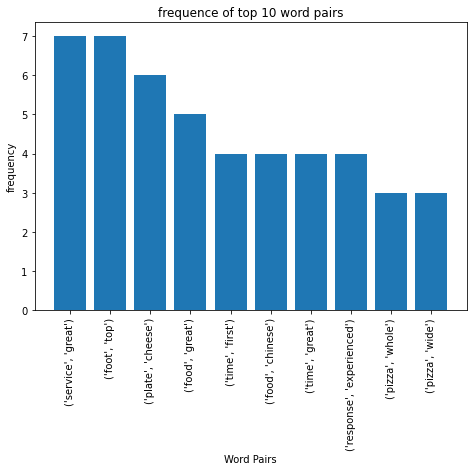

In [117]:
barplot_for_the_frequent_word_pairs(data_random_50_rating_1,10)

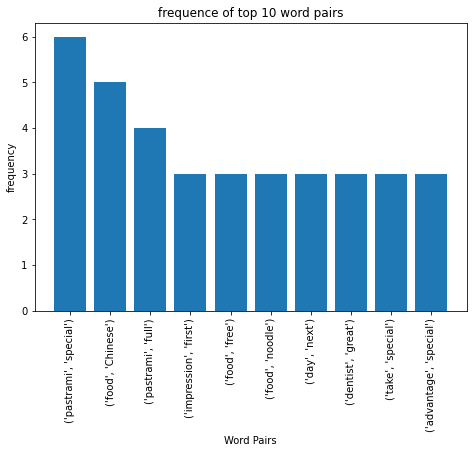

In [119]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_2,10)

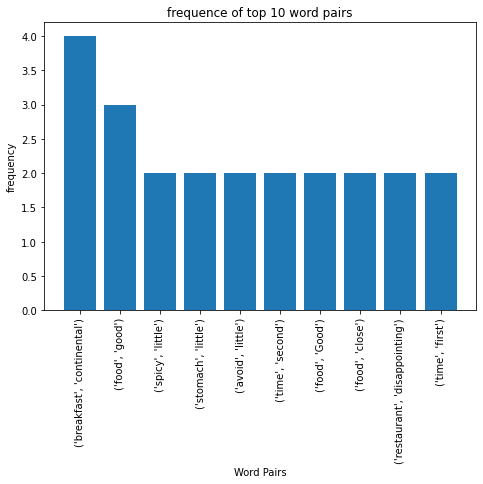

In [120]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_3,10)

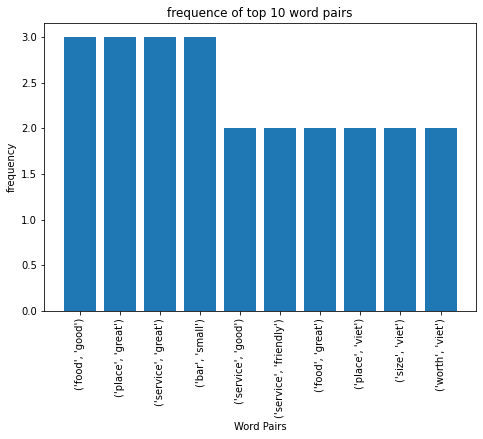

In [121]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_4,10)

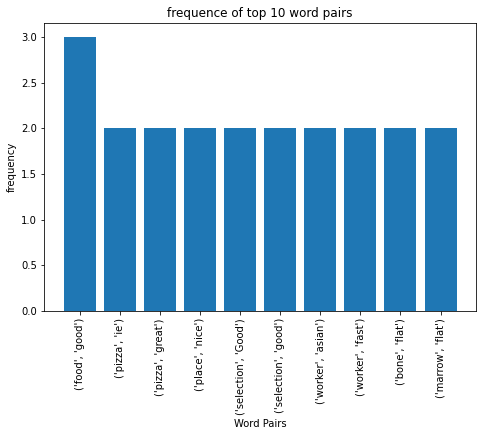

In [122]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_5,10)

# Wordclouds For Data Being Used For Each User Rating. 

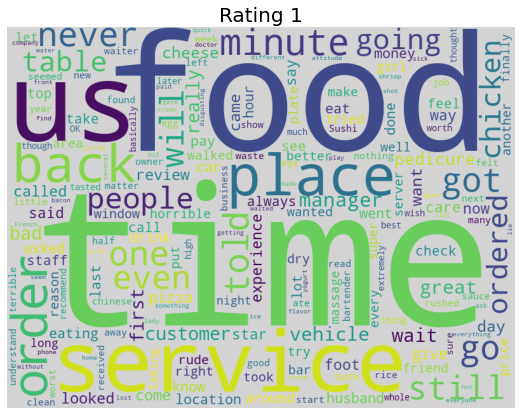

In [95]:
show_wordclouds(data_random_50_rating_1,"Rating 1")

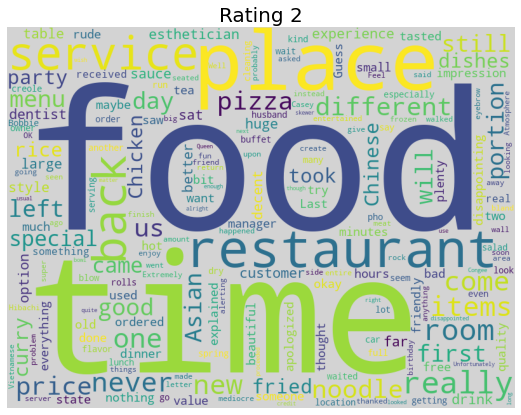

In [96]:
show_wordclouds(data_random_20_rating_2,"Rating 2")

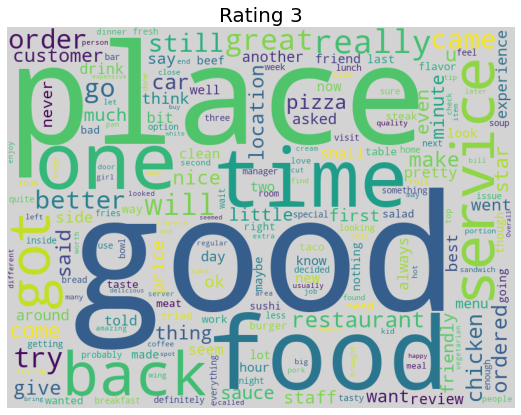

In [97]:
show_wordclouds(data_random_rating_3,"Rating 3")

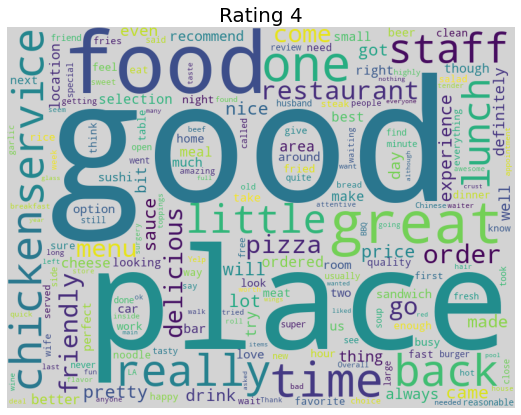

In [98]:
show_wordclouds(data_random_rating_4,"Rating 4")

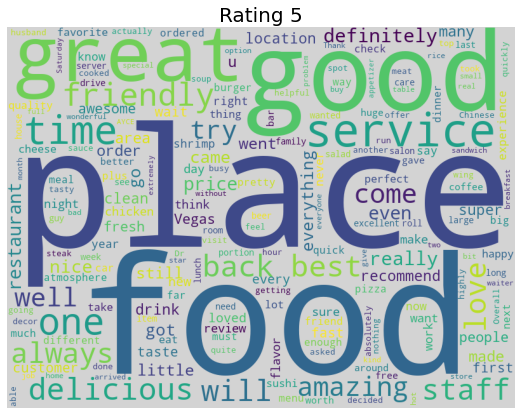

In [99]:
show_wordclouds(data_random_rating_5,"Rating 5")